## TASK 3: TOPIC CLASSIFICATION

Topics are the main area of interest of a text or simply what a text is about. Topics are constantly changing and subjective; making topic classificaiton a challenging task. Topic classification is the task of assigning a topic to a text. The are several traditional machine learing approahces like SVM, Naive Bayes that rely on manually engineered features. Meanwhile transformer-based models like BERT and RoBERTa allow learning deep contextualized representations of language improving topic classifciation. This project explore the use of XLnet, an advanced transformer model that utilizes bidirectional context while beign autoregressive in nature. The goal is to fine-tune XLNet on the 20 newgroups dataset, perform error analyisis and understand the strength and weaknesses of the model generating a fruitful analysis on the effectiveness of XLNet on topic classification. Alternatievly, a traditional Machine Learning model will be used to perform topic classification on the same data set. The results between both approaches will be comapred and contrasted to generate a comaprison between approaches.  

In [6]:
!pip install simpletransformers

import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.9 MB/s eta 0:00:00
 

### Data selection and Processing

The 20 Newsgroups dataset contains 20 different categories of text data (topics) such as computer graphics, science, religion, sports, and more. The topics in the newsgroup data alone would not suffice to create a good modle that can predict the topcis in the test data: books, movies and sports. As a result a combination of a seperate movie and books data imported from kaggle along with the available sport categories in the 20 Newsgroups dataset was used. Details on the exact processing can be found in the TopicModelling_TrainingData file.

- Books data: https://www.kaggle.com/datasets/anshtanwar/top-200-trending-books-with-reviews?select=customer+reviews.csv
- Movies data: https://www.kaggle.com/datasets/nltkdata/movie-review?select=movie_review.csv

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train = pd.read_csv('/content/drive/MyDrive/Text Mining project/my_training_data.csv')
print(train.head())

                                                text   topic
0  \n\nThe tribe will be in town from April 16 to...  sports
1  This game would have been great as part of a d...  sports
2  My god, hope we don't have to put up with this...  sports
3  \n\n\nI heard it will be the Minnesota-Detroit...  sports
4  I would like to make everyone aware that in wi...  sports


In [8]:
#mapping the sting topic labels to numbers for later convience
label_map = {"sports": 0, "book": 1, "movie": 2}
train["true_label"] = train["topic"].map(label_map)

train.rename(columns={"true_label": "labels"}, inplace=True)
print(train.head(10))

                                                text   topic  labels
0  \n\nThe tribe will be in town from April 16 to...  sports       0
1  This game would have been great as part of a d...  sports       0
2  My god, hope we don't have to put up with this...  sports       0
3  \n\n\nI heard it will be the Minnesota-Detroit...  sports       0
4  I would like to make everyone aware that in wi...  sports       0
5  United States Coverage:\nSunday April 18\n  N....  sports       0
6  \n\n\n\n\n\nIf I remember correctly (Which is ...  sports       0
7   \n\nHmmmm, I'm not sure this is true.  Accord...  sports       0
8  \nI think Murray has done a great job.  He's p...  sports       0
9  Well Bruins fans it's playoff time again.\nIt ...  sports       0


In [9]:
#stratified split of 90% data as train set and 10% as dev set
train, dev = train_test_split(train, test_size=0.1, random_state=0, stratify=train[['topic']])
print(f'Length of training data: {len(train)}')
print("train:", train[['topic']].value_counts(sort=False))
train.head(5)


Length of training data: 2805
train: topic 
book       828
movie      900
sports    1077
Name: count, dtype: int64


,text,topic,labels
977,"\nThere is NO TEAM, repeat, NO TEAM, that is A...",sports,0
1300,"even today , fascination with this film is on ...",movie,2
261,\nXenophobic trash deleted.\n\n\nIf you're goi...,sports,0
3025,My favorite book!,book,1
1876,"hilarious , ultra-low budget comedy from film ...",movie,2


In [8]:
#development set
print(f'Length of development data: {len(dev)}')
print("dev:", dev[['topic']].value_counts(sort=False))
dev.head(5)

Length of development data: 312
dev: topic 
book       92
movie     100
sports    120
Name: count, dtype: int64


,text,topic,labels
1257,"as the screws tighten , and the tensions mount...",movie,2
665,I agree. It was great for the ESPN people to s...,sports,0
2053,"but in this case , the total feeling of amnesi...",movie,2
1568,the police negotiator is the person with the e...,movie,2
3044,So insightful book great book I demand everyon...,book,1


In [9]:
#test set
test = pd.read_csv("/content/drive/MyDrive/Text Mining project/sentiment-topic-test (1).tsv", sep="\t")
print(test.head())

   sentence_id                                           sentence sentiment  \
0            0  The atmosphere at the stadium tonight was elec...  positive   
1            1  The game was so intense I forgot to breathe at...  positive   
2            2           It had me hooked from the first chapter.  positive   
3            3  It’s more of a slow burn than a page-turner, b...   neutral   
4            4  It’s split into two timelines, which keeps it ...   neutral   

    topic  
0  sports  
1  sports  
2    book  
3    book  
4    book  


In [10]:
#the topic label in the test data are strings it must be covereted into integeres for later processing

label_map = {"sports": 0, "book": 1, "movie": 2, "neutral": 3}
test["true_label"] = test["topic"].map(label_map)

print(test.head(10))

   sentence_id                                           sentence sentiment  \
0            0  The atmosphere at the stadium tonight was elec...  positive   
1            1  The game was so intense I forgot to breathe at...  positive   
2            2           It had me hooked from the first chapter.  positive   
3            3  It’s more of a slow burn than a page-turner, b...   neutral   
4            4  It’s split into two timelines, which keeps it ...   neutral   
5            5  I could watch this film a hundred times and st...  positive   
6            6  Best thriller I’ve seen in ages. Had me on the...  positive   
7            7  How do you concede three goals in ten minutes?...  negative   
8            8  They rotated their squad for the cup game, whi...   neutral   
9            9  The trailer gave away most of the plot, but th...   neutral   

    topic  true_label  
0  sports           0  
1  sports           0  
2    book           1  
3    book           1  
4    book 

In [11]:
#test set overview
print(f'Length of test data: {len(test)}')
print("test:", test[['topic']].value_counts(sort=False))
dev.head(5)

Length of test data: 18
test: topic 
book      6
movie     6
sports    6
Name: count, dtype: int64


,text,topic,labels
1257,"as the screws tighten , and the tensions mount...",movie,2
665,I agree. It was great for the ESPN people to s...,sports,0
2053,"but in this case , the total feeling of amnesi...",movie,2
1568,the police negotiator is the person with the e...,movie,2
3044,So insightful book great book I demand everyon...,book,1


### Model processing

In [10]:
#XLNet model configurations

model_args = ClassificationArgs()

model_args.overwrite_output_dir = True
model_args.evaluate_during_training = True

model_args.num_train_epochs = 10
model_args.train_batch_size = 32
model_args.eval_batch_size = 32
model_args.learning_rate = 4e-6
model_args.max_seq_length = 256

model_args.use_early_stopping = True
model_args.early_stopping_delta = 0.01
model_args.early_stopping_metric = "eval_loss"
model_args.early_stopping_metric_minimize = True
model_args.early_stopping_patience = 2
model_args.evaluate_during_training_steps = 32

model_args.model_name = 'xlnet-base-cased'
model_args.use_multiprocessing = True  #multiprocessing to speed up training
model_args.use_early_stopping = True  #stopping early based on eval_loss

model_args.train_batch_size = 16
model_args.eval_batch_size = 16


In [11]:
steps_per_epoch = int(np.ceil(len(train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch))

Each epoch will have 176 steps.


In [12]:
model = ClassificationModel("xlnet", "xlnet-base-cased", num_labels=3, args=model_args, use_cuda=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

In [13]:
print(str(model.args).replace(',', '\n'))

ClassificationArgs(adafactor_beta1=None
 adafactor_clip_threshold=1.0
 adafactor_decay_rate=-0.8
 adafactor_eps=(1e-30
 0.001)
 adafactor_relative_step=True
 adafactor_scale_parameter=True
 adafactor_warmup_init=True
 adam_betas=(0.9
 0.999)
 adam_epsilon=1e-08
 best_model_dir='outputs/best_model'
 cache_dir='cache_dir/'
 config={}
 cosine_schedule_num_cycles=0.5
 custom_layer_parameters=[]
 custom_parameter_groups=[]
 dataloader_num_workers=0
 do_lower_case=False
 dynamic_quantize=False
 early_stopping_consider_epochs=False
 early_stopping_delta=0.01
 early_stopping_metric='eval_loss'
 early_stopping_metric_minimize=True
 early_stopping_patience=2
 encoding=None
 eval_batch_size=16
 evaluate_during_training=True
 evaluate_during_training_silent=True
 evaluate_during_training_steps=32
 evaluate_during_training_verbose=False
 evaluate_each_epoch=True
 fp16=True
 gradient_accumulation_steps=1
 learning_rate=4e-06
 local_rank=-1
 logging_steps=50
 loss_type=None
 loss_args={}
 manual_seed

In [14]:
_, history = model.train_model(train, eval_df=dev)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 10:   0%|          | 0/176 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 10:   0%|          | 0/176 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


###Results

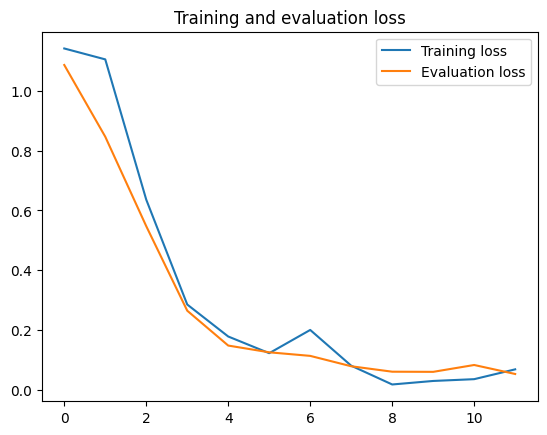

In [15]:
train_loss = history['train_loss']
eval_loss = history['eval_loss']

plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss')
plt.legend()


In [16]:
#evaluating the model on the development set ot get mcc and eval loss
result, model_outputs, wrong_predictions = model.eval_model(dev)
result


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


{'mcc': np.float64(0.9661929867596191), 'eval_loss': 0.053249187767505646}

###Testing

In [17]:
predictions, probabilities = model.predict(test["sentence"].tolist())
test["predicted"] = predictions


0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:2188: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [18]:
test.head(5)

,sentence_id,sentence,sentiment,topic,true_label,predicted
0,0,The atmosphere at the stadium tonight was elec...,positive,sports,0,0
1,1,The game was so intense I forgot to breathe at...,positive,sports,0,0
2,2,It had me hooked from the first chapter.,positive,book,1,1
3,3,"It’s more of a slow burn than a page-turner, b...",neutral,book,1,1
4,4,"It’s split into two timelines, which keeps it ...",neutral,book,1,1


###Evaluation and discussion

The evaluation loss graph shows that the model is learning effectively over time. Both the training and evaluation losses decrease steadily during the initial epochs (0-4), indicating that the model is successfully minimizing errors on both seen and unseen data. Around epoch 6 or 7, there's a slight bump in the training loss, which could be due to a temporary learning rate adjustment or variability from the small batch size. Despite this, the overall trend remains downward. Toward the later epochs (8-10), the evaluation loss begins to flatten and slightly increase, suggesting mild overfitting — where the model continues improving on the training data but looses the capacity to generalizes as well to the validation set and in general overall. However, the gap between training and evaluation loss remains small, which indicates that the model still generalizes comparitevly well.

In [19]:
print(classification_report(test['true_label'], test['predicted']))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.56      0.83      0.67         6
           2       0.00      0.00      0.00         6

    accuracy                           0.61        18
   macro avg       0.41      0.61      0.49        18
weighted avg       0.41      0.61      0.49        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
